## Beer Recommendation System --Milestone report 1


In [1]:
# main modules needed
# Data analysis libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")



In [2]:
# Data fields
# brewery_id - an identifier for the brewery
# beer_ABV - the alcohol by volume of the beer
# beer_beerId - a unique ID indicating the beer reviewed
# beer_brewerId - a unique ID indicating the brewery
# beer_name - name of the beer
# beer_style- The style of beer
# # review_appearance - rating of the beer's appearance (1.0 to 5.0)
# review_aroma - rating of the beer's aroma (1.0 to 5.0)
# review_overall - rating of the beer overall (1.0 to 5.0)
# review_palate - rating of the beer's palate (1.0 to 5.0)
# review_taste - rating of the beer's taste (1.0 to 5.0)
## review_time - a dict specifying when the review was submitted

###  1.1 Basic information acquiring

In [3]:
df=pd.read_csv('beer_reviews.csv')

In [4]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
df.shape

(1586614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [7]:
print(df.isnull().sum())

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1586614 non-null float64
beer_beerid           1586614 non-null int64
style_mean_ABV        1586614 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 169.5+ MB


In [13]:
df=df.dropna()

In [14]:
# Check for null values
print(df.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
style_mean_ABV        0
dtype: int64


In [15]:
## Basic information extraction

In [16]:
## Total number of unique breweries

In [17]:
print( 'Unique breweries:' )
print( 'Based on brewery id:', df[ 'brewery_id' ].nunique() )
print( 'Based on name:', df[ 'brewery_name' ].nunique() )

Unique breweries:
Based on brewery id: 5838
Based on name: 5742


In [18]:
 ## Total number of  unique beers

In [19]:
print( 'Unique beers:' )
print( 'Based on beer id:', df[ 'beer_beerid' ].nunique() )
print( 'Based on name:', df[ 'beer_name' ].nunique() )

Unique beers:
Based on beer id: 66040
Based on name: 56847


In [20]:
 ## Total number of  unique reviewers

In [21]:
print( 'Unique reviewers:', df[ 'review_profilename' ].nunique() )

Unique reviewers: 33387


In [22]:
## Total number of  unique reviewers with equal or more than 2 review

In [23]:
from collections import Counter
Counter(df['review_profilename'].value_counts() > 1)

Counter({True: 22944, False: 10443})

### 1.2 Data Cleaning

In [ ]:
## find nan value in "beer_abv" and replace the nan with mean abv of the style

In [8]:
df['style_mean_ABV'] = df.groupby('beer_style')['beer_abv'].transform('mean')

In [9]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,5.259333
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,7.333734
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,7.682464
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,5.044384
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,9.370135


In [10]:
## find out indexes with nan values
indexes = df['beer_abv'].index[df['beer_abv'].apply(np.isnan)]

In [11]:
## replace the nan with mean abv of the style
n=[]
for i in indexes:
    n.append(i)
    df['beer_abv'][i]=df['style_mean_ABV'][i]
print(len(n))

67785


In [24]:
## count the number of review and discard the number <5

In [25]:
df['id_count'] = df.groupby('beer_beerid')['beer_beerid'].transform('count')

In [26]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV,id_count
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,5.259333,1
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,7.333734,1
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,7.682464,1
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,5.044384,1
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,9.370135,1


In [27]:
df_re=df[df.id_count>=5]

In [28]:
df.shape

(1586251, 15)

In [29]:
df_re.shape

(1509369, 15)

In [30]:
### Ensure review index in appropriate range (1.0-5.0)

## 2. Data Exploration

### 2.1 Describe statistics 

In [31]:
df_re=df_re[(df.review_overall>0 )|(df.review_overall <5 )
            |(df.review_aroma >0 )|(df.review_aroma<5)
           |(df.review_appearance >0 )|(df.review_appearance<5)
           |(df.review_palate >0 )|(df.review_palate<5)
           |(df.review_taste >0 )|(df.review_taste<5)]

In [32]:
### Deal with review_time

In [33]:
df_re[ 'review_time' ] = pd.to_datetime( df[ 'review_time' ], unit = 's' )

In [34]:
df_re.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV,id_count
5,1075,Caldera Brewing Company,2012-01-02 17:17:39,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159,6.591905,9
6,1075,Caldera Brewing Company,2011-10-19 02:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.591905,9
7,1075,Caldera Brewing Company,2011-05-24 22:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159,6.591905,9
8,1075,Caldera Brewing Company,2010-11-22 19:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,6.591905,9
9,1075,Caldera Brewing Company,2010-09-28 00:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.591905,9


In [35]:
df_groupby_year = df_re[['review_time' ]].groupby(df_re[ 'review_time' ].dt.year).agg(['count'])

In [36]:
df_groupby_year.reset_index()
df_groupby_year=df_groupby_year['review_time'].reset_index()

In [37]:
df_groupby_year=df_groupby_year.rename(columns={'count':'Review Count/year'})

In [38]:
df_groupby_year.head()

,review_time,Review Count/year
0,1996,1
1,1998,78
2,1999,33
3,2000,99
4,2001,1870


<Figure size 1584x576 with 0 Axes>

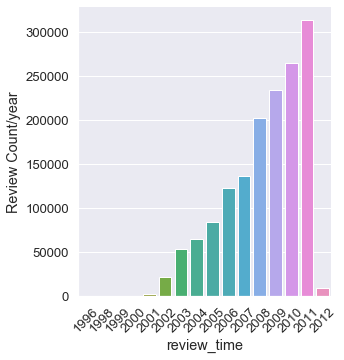

In [39]:
import seaborn as sns; sns.set(style="ticks", color_codes=True);sns.set(font_scale=1.2)
plt.figure( figsize = ( 22, 8) )
chart=sns.catplot(x='review_time',y='Review Count/year',data=df_groupby_year,kind='bar')
chart.set_xticklabels(rotation=45)

In [42]:
df_groupby_id=df_re[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv','beer_beerid']].groupby(df['beer_beerid']).mean()

In [56]:
df_groupby_id.describe().round(2)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,22376.00,22376.00,22376.00,22376.00,22376.00,22376.00,22376.00
mean,3.70,3.60,3.73,3.62,3.64,6.51,32027.13
std,0.46,0.48,0.39,0.45,0.50,2.09,22325.11
min,1.11,1.17,1.22,1.22,1.11,0.05,4.00
25%,3.50,3.38,3.55,3.40,3.40,5.00,10474.50
50%,3.78,3.67,3.80,3.69,3.72,6.00,30861.50
75%,4.00,3.93,4.00,3.91,4.00,7.50,50816.75
max,4.94,5.00,4.93,4.94,4.94,41.00,76896.00


In [46]:
### ECDF for the review indexes

In [47]:
  def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

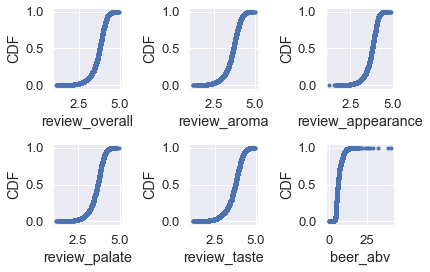

<Figure size 288x288 with 0 Axes>

In [48]:
# Get the CDF of the samples and of the data
x,y=ecdf(df_groupby_id['review_overall'])

# Plot the CDFs and show the plot for protein
plt.subplot(2,3,1)
_ = plt.plot(x, y,marker='.', linestyle='none')
_ = plt.xlabel('review_overall')
_ = plt.ylabel('CDF')


# Plot the CDFs and show the plot for oil
x,y=ecdf(df_groupby_id['review_aroma'])
plt.subplot(2,3,2)
_ = plt.plot(x, y,marker='.', linestyle='none')
_ = plt.xlabel('review_aroma')
_ = plt.ylabel('CDF')

# Plot the CDFs and show the plot for yield

x,y=ecdf(df_groupby_id['review_appearance'])
plt.subplot(2,3,3)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('review_appearance')
_ = plt.ylabel('CDF')


x,y=ecdf(df_groupby_id['review_palate'])
plt.subplot(2,3,4)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('review_palate')
_ = plt.ylabel('CDF')

x,y=ecdf(df_groupby_id['review_taste'])
plt.subplot(2,3,5)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('review_taste')
_ = plt.ylabel('CDF')

x,y=ecdf(df_groupby_id['beer_abv'])
plt.subplot(2,3,6)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('beer_abv')
_ = plt.ylabel('CDF')


plt.tight_layout()
plt.figure(figsize=(4 , 4))
plt.show()


### Check the normal distribution for three trait 

In [49]:
from scipy.stats import normaltest
from scipy import stats

In [50]:
statistic, p_val = normaltest(df_groupby_id['review_overall'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_overall'], 'norm')

chi-square statistic: 4604.656760553541
p value = 0.0


KstestResult(statistic=0.9763064125582813, pvalue=0.0)

In [51]:
statistic, p_val = normaltest(df_groupby_id['review_aroma'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_aroma'], 'norm')

chi-square statistic: 3238.9742093495734
p value = 0.0


KstestResult(statistic=0.9722223805475046, pvalue=0.0)

In [52]:
statistic, p_val = normaltest(df_groupby_id['review_appearance'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_appearance'], 'norm')

chi-square statistic: 4789.868740232632
p value = 0.0


KstestResult(statistic=0.9834810603595563, pvalue=0.0)

In [53]:
statistic, p_val = normaltest(df_groupby_id['review_palate'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_palate'], 'norm')

chi-square statistic: 3758.367170256619
p value = 0.0


KstestResult(statistic=0.975485573823325, pvalue=0.0)

In [54]:
statistic, p_val = normaltest(df_groupby_id['review_taste'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_taste'], 'norm')

chi-square statistic: 3526.015632950551
p value = 0.0


KstestResult(statistic=0.970613513904673, pvalue=0.0)

In [55]:
statistic, p_val = normaltest(df_groupby_id['beer_abv'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['beer_abv'], 'norm')

chi-square statistic: 10273.140065342548
p value = 0.0


KstestResult(statistic=0.9942704094406616, pvalue=0.0)

In [40]:
### Deal with review_profilename

In [41]:
df_re['review_profilename'].fillna('Unknown', inplace=True)

## 2.2 Ranking and sorting beer brand, style and brewery

Add a new column to hold "review_average" over 5 indexes

In [58]:
df_re['review_average'] = df_re.apply(lambda row: (row["review_overall"] + row["review_aroma"] + 
                                                 row["review_appearance"] + row["review_palate"] + 
                                                 row["review_taste"]) / 5, axis=1)

In [59]:
df_new = df_re.drop(df_re[(df_re["review_average"] < 1) | (df_re["review_average"] > 5)].index)
df_new.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV,id_count,review_average
5,1075,Caldera Brewing Company,2012-01-02 17:17:39,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159,6.591905,9,3.3
6,1075,Caldera Brewing Company,2011-10-19 02:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.591905,9,3.7
7,1075,Caldera Brewing Company,2011-05-24 22:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159,6.591905,9,2.9
8,1075,Caldera Brewing Company,2010-11-22 19:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,6.591905,9,3.6
9,1075,Caldera Brewing Company,2010-09-28 00:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.591905,9,4.2


In [60]:
# Find out popular beer brand(by beer_name)
##Sort Data by Beer Style

In [61]:
#Creat a dataframe for beer count by style
beer_type = df_new.reset_index()
beer_type_df = beer_type.groupby(['beer_style']).count()
beer_type_df = beer_type_df[['beer_name']]
beer_type_df = beer_type_df.sort_values(['beer_name'], ascending=False)
beer_type_df = beer_type_df.reset_index()
beer_type_df = beer_type_df.rename(columns={'beer_name': 'beer_count'})

#Preview dataframe
beer_type_df.head(10)

,beer_style,beer_count
0,American IPA,113514
1,American Double / Imperial IPA,84386
2,American Pale Ale (APA),59523
3,Russian Imperial Stout,53263
4,American Double / Imperial Stout,49742
5,American Porter,47912
6,American Amber / Red Ale,42741
7,Belgian Strong Dark Ale,36955
8,Fruit / Vegetable Beer,31633
9,American Strong Ale,31164


In [62]:

style_means = df_new.groupby(['beer_style']).review_average.mean()
beer_style_means_score = pd.DataFrame(style_means)
beer_style_means_score = beer_style_means_score.sort_values(['review_average'], ascending=False)
beer_style_means_score = beer_style_means_score.reset_index()


beer_style_means_score.head(10)

,beer_style,review_average
0,Quadrupel (Quad),4.134667
1,American Double / Imperial Stout,4.131328
2,Russian Imperial Stout,4.111732
3,American Wild Ale,4.094851
4,Eisbock,4.090112
5,Gueuze,4.084531
6,American Double / Imperial IPA,4.060573
7,Weizenbock,4.033709
8,Lambic - Unblended,4.031548
9,Flanders Red Ale,4.024251


In [63]:
brand_means = df_new.groupby(['beer_name']).review_average.mean()
beer_brand_means_score = pd.DataFrame(brand_means)
beer_brand_means_score = beer_brand_means_score.sort_values(['review_average'], ascending=False)
beer_brand_means_score = beer_brand_means_score.reset_index()

In [64]:
beer_brand_means_score.head(10)

,beer_name,review_average
0,Alesmith Speedway Stout - Vanilla And Coconut,4.887500
1,El Gordo,4.828571
2,Rare D.O.S.,4.745455
3,Pilot Series Passionfruit And Dragonfruit Berl...,4.742857
4,M Belgian-Style Barleywine,4.735714
5,Capricho Oscuro - Batch 1,4.716667
6,Imperial Hefeweizen,4.716667
7,Coffee Infused Imperial Stout Trooper,4.700000
8,Cantillon La Dernière Cuvée Du 89,4.683333
9,Eisbock,4.680000


#### Sort Data by Breweries 

In [65]:
brew_rating = df_new.groupby(["brewery_name", "brewery_id"])
average_rating = round(brew_rating['review_average'].mean(), 2)
brewery_avg_rating_df = pd.DataFrame(average_rating)
brewery_avg_rating_df = brewery_avg_rating_df.reset_index()
brewery_avg_rating_df = brewery_avg_rating_df.sort_values(['review_average'], ascending=False)
#Preview the dataframe
brewery_avg_rating_df.head(10)

,brewery_name,brewery_id,review_average
761,Celis Brewery Inc.,56,4.61
647,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,313,4.51
1944,Närke Kulturbryggeri AB,10902,4.48
2554,The Alchemist,27039,4.47
1795,Micro Cervejaria Falke Bier,10287,4.47
2062,Peg's Cantina & Brewpub / Cycle Brewing,22147,4.47
1755,Martha's Vineyard Ales,1111,4.44
1982,Old Chimneys Brewery,6560,4.43
229,Benny Brewing Company,24757,4.42
1529,Kane Brewing Company,26676,4.41


In [66]:
#Clean dataframe to remove special characters 
clean_brew_df = brewery_avg_rating_df[~brewery_avg_rating_df['brewery_name'].astype(str).str.contains('[^a-zA-Z0-9 ]', regex=True)]
clean_brew_df = clean_brew_df.reset_index()
clean_brew_df = clean_brew_df.drop(columns='index')

#Preview the dataframe
clean_brew_df.head(10)

,brewery_name,brewery_id,review_average
0,The Alchemist,27039,4.47
1,Micro Cervejaria Falke Bier,10287,4.47
2,Old Chimneys Brewery,6560,4.43
3,Benny Brewing Company,24757,4.42
4,Kane Brewing Company,26676,4.41
5,Breakwater Brewing,17988,4.38
6,Brauerei Zehendner GmbH,5983,4.38
7,Russian River Brewing Company,863,4.33
8,Original Gravity Brewing Company,17232,4.32
9,La Brasserie Seigneriale,1490,4.32


In [67]:
 ## Find out top 10 Strongest Beers by ABV

In [68]:
# Top 10 Beers by ABV
top_10_abv = df_new[['beer_name','beer_abv']].sort_values('beer_abv', ascending=False).drop_duplicates('beer_name').\
    head(10).sort_values('beer_abv', ascending=False)

top_10_abv

,beer_name,beer_abv
746344,Sink The Bismarck!,41.00
996154,Black Damnation VI - Messy,39.00
748384,Tactical Nuclear Penguin,32.00
1042331,Dave,29.00
293956,Samuel Adams Utopias,27.00
993838,Black Damnation V - Double Black,26.00
286322,Samuel Adams Utopias MMIII,25.00
297540,Samuel Adams Utopias MMII,24.00
1386390,Colossus,21.92
284148,Samuel Adams Millennium,21.00


### 2.3 Relationship among the features 

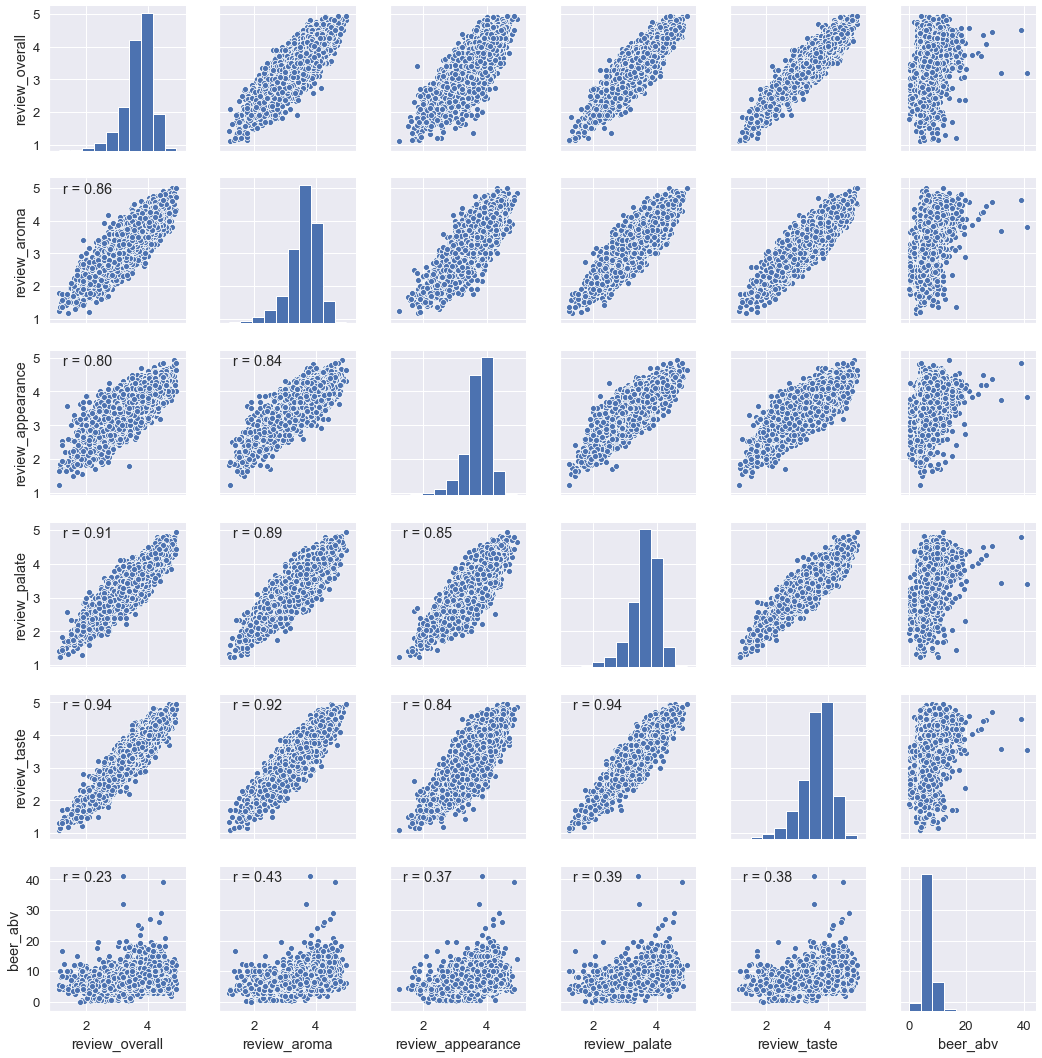

In [43]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r_, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    r = 'r'
    ax.annotate(f'{r} = {r_:.2f}', xy=(.1, .9), xycoords=ax.transAxes)


g=sns.pairplot( df_groupby_id, vars=['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'])


g.map_lower(corrfunc)
plt.show()

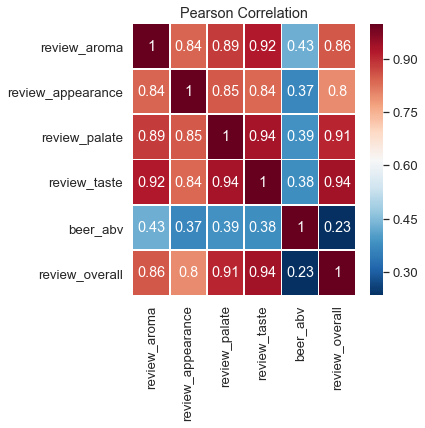

In [57]:
import seaborn as sb
pearsoncorr = df_groupby_id[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'review_overall']].corr(method='pearson')

plt.figure( figsize = ( 5, 5 ))
plt.title( 'Pearson Correlation' )

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### Significance tests for the correlation

In [44]:
import itertools
import operator
list_comb=list(itertools.combinations(['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'], 2))
list_comb

[('review_overall', 'review_aroma'),
 ('review_overall', 'review_appearance'),
 ('review_overall', 'review_palate'),
 ('review_overall', 'review_taste'),
 ('review_overall', 'beer_abv'),
 ('review_aroma', 'review_appearance'),
 ('review_aroma', 'review_palate'),
 ('review_aroma', 'review_taste'),
 ('review_aroma', 'beer_abv'),
 ('review_appearance', 'review_palate'),
 ('review_appearance', 'review_taste'),
 ('review_appearance', 'beer_abv'),
 ('review_palate', 'review_taste'),
 ('review_palate', 'beer_abv'),
 ('review_taste', 'beer_abv')]

In [45]:
import scipy
from scipy import stats
for i in list_comb:
    x=df_groupby_id[i[0]]
    y=df_groupby_id[i[1]]
    print("Pearson correlation coefficient and p-value for ", i,scipy.stats.pearsonr(x,y))
    

Pearson correlation coefficient and p-value for  ('review_overall', 'review_aroma') (0.8556310842774338, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'review_appearance') (0.7982713479854335, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'review_palate') (0.9097276019368215, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'review_taste') (0.9384916169722866, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'beer_abv') (0.2330840813596477, 9.280173642066822e-274)
Pearson correlation coefficient and p-value for  ('review_aroma', 'review_appearance') (0.8399758891161931, 0.0)
Pearson correlation coefficient and p-value for  ('review_aroma', 'review_palate') (0.8856116465274669, 0.0)
Pearson correlation coefficient and p-value for  ('review_aroma', 'review_taste') (0.9227778760647021, 0.0)
Pearson correlation coefficient and p-value for  ('review_aroma', 'beer_abv') (0.430642530602188, 0

### Data format was converted to fit in Surprise 

In [69]:
df_surprise=df_new[['beer_beerid','review_average','review_profilename']]

In [70]:
df_surprise.head()

,beer_beerid,review_average,review_profilename
5,52159,3.3,oline73
6,52159,3.7,Reidrover
7,52159,2.9,alpinebryant
8,52159,3.6,LordAdmNelson
9,52159,4.2,augustgarage
